In [2]:
import pandas as pd
from io import StringIO

In [3]:
csv_data = '''A,B,C,D \n 1.0,2.0,3.0,4.0 \n 5.0,6.0,,8.0 \n 10.0,11.0,12.0'''

In [4]:
print(csv_data)

A,B,C,D 
 1.0,2.0,3.0,4.0 
 5.0,6.0,,8.0 
 10.0,11.0,12.0


In [5]:
df = pd.read_csv(StringIO(csv_data))

In [6]:
print(df)

      A     B     C   D 
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN


# Dealing with missing values

In [7]:
df.isnull().sum()

A     0
B     0
C     1
D     1
dtype: int64

In [8]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [9]:
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [10]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [11]:
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [12]:
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [13]:
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [14]:
from sklearn.impute import SimpleImputer
import numpy as np

imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [15]:
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


# Categorical Data

In [16]:
df_cat = pd.DataFrame([
    ['green','M',10.1, 'class2'],
    ['red','L',13.5, 'class1'],
    ['blue','XL',15.3, 'class2'],
])

In [17]:
df_cat.columns = ['color', 'size', 'price', 'classlabel']

In [18]:
df_cat

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


# Mapping Ordinal Features

In [19]:
size_mapping = {
    'XL' : 3,
    'L' : 2,
    'M' : 1
}

In [20]:
df_cat['size'] = df_cat['size'].map(size_mapping)

In [21]:
df_cat

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [22]:
# inverse the size mapping
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df_cat['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

In [23]:
df_cat

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


# Encoding class labels - Enumerate

In [24]:
#class_mapping = {label: idx for idx, label in enumerate(np.unique(df_cat['classlabel']))}

In [25]:
#class_mapping

In [26]:
#df_cat['classlabel'] = df_cat['classlabel'].map(class_mapping)

In [27]:
df_cat

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [28]:
# inverse the class mapping
#inv_class_mapping = {v: k for k, v in class_mapping.items()}
#df_cat['classlabel'] = df_cat['classlabel'].map(inv_class_mapping)
#df_cat
## THIS DIDN'T WORK

In [29]:
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df_cat['classlabel'].values)
y

array([1, 0, 1])

In [30]:
# inverse the class mapping
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

# One-Hot Encoding - Nominal Features (Unordered)

In [31]:
X = df_cat[['color','size','price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [32]:
from sklearn.preprocessing import OneHotEncoder

X = df_cat[['color','size','price']].values
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:, 0].reshape(-1,1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [33]:
from sklearn.compose import ColumnTransformer

X = df_cat[['color', 'size', 'price']].values

c_transf = ColumnTransformer([
    ('onehot',OneHotEncoder(),[0]),
    ('nothing','passthrough',[1,2])
])

c_transf.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [34]:
pd.get_dummies(df_cat[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [35]:
pd.get_dummies(df_cat[['price', 'color', 'size']], drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [36]:
# drop via one hot encoder
color_ohe = OneHotEncoder(categories='auto', drop='first')

c_transf = ColumnTransformer([
            ('onehot', color_ohe, [0]),
            ('nothing', 'passthrough', [1,2])
])

c_transf.fit_transform(X).astype(float)

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

# Partitioning Datasets

In [37]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                  'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocynanins', 'Color intensity',
                  'Hue', 'OD280/OD315 of diluted wines', 'Proline']

print('Class labels', np.unique(df_wine['Class label']))

Class labels [1 2 3]


In [38]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocynanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [39]:
from sklearn.model_selection import train_test_split

X = df_wine.iloc[:, 1:].values
y = df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Feature Scaling

In [40]:
# normalization
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [41]:
# standardization
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train) # ONLY FIT TO Training dataset
X_test_std = stdsc.transform(X_test)

# Regularization

In [42]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1',C=1.0,solver='liblinear',multi_class='ovr')

In [43]:
lr.fit(X_train_std,y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


In [44]:
lr.intercept_ # bias terms

array([-1.26342201, -1.21591165, -2.37082417])

In [45]:
lr.coef_ # weights

array([[ 1.24587832,  0.18108797,  0.74226819, -1.15997168,  0.        ,
         0.        ,  1.17450801,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54217285,  2.510991  ],
       [-1.53727787, -0.38726959, -0.99514557,  0.36497259, -0.05971587,
         0.        ,  0.66811813,  0.        ,  0.        , -1.93426243,
         1.2335247 ,  0.        , -2.2315451 ],
       [ 0.13520021,  0.17007438,  0.35761797,  0.        ,  0.        ,
         0.        , -2.43298134,  0.        ,  0.        ,  1.5618576 ,
        -0.81642778, -0.49783534,  0.        ]])

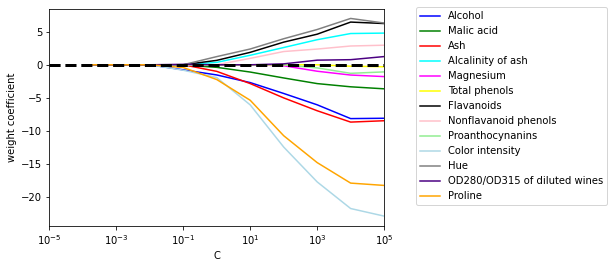

In [46]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue',
         'gray', 'indigo', 'orange']

weights, params = [], []

for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear',multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
    
weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label=df_wine.columns[column + 1], color=color)
    
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5),10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()

In [47]:
from sequential_backward_selection import SBS
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

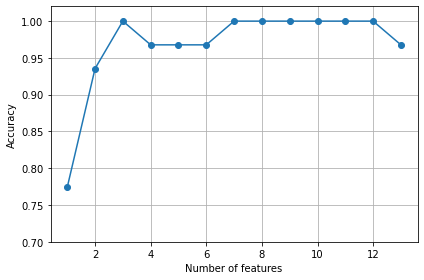

In [48]:
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [49]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [50]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.967741935483871
Test accuracy: 0.9629629629629629


In [54]:
knn.fit(X_train_std[:, k3], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k3], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k3], y_test))

Training accuracy: 0.9516129032258065
Test accuracy: 0.9259259259259259


# Assessing Feature Importance with Random Forests

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocynanins               0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


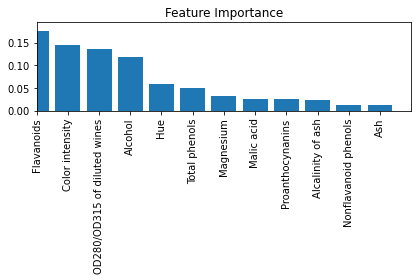

In [56]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),importances[indices],align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [57]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold', 'criterion:', X_selected.shape[1])

Number of features that meet this threshold criterion: 5


In [58]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
